In [40]:
import rdkit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from gensim.models import word2vec
from mol2vec.features import mol2alt_sentence, MolSentence, DfVec, sentences2vec
from mol2vec.helpers import depict_identifier, plot_2D_vectors, IdentifierTable, mol_to_svg
%matplotlib inline

In [41]:
df = pd.read_csv('data/ESOL-solubility.csv')
df['RDKitMol'] = [rdkit.Chem.MolFromSmiles(x) for x in df['SMILES']]
df.head()

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES,RDKitMol
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.077,FC(F)(Cl)C(F)(Cl)Cl,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."


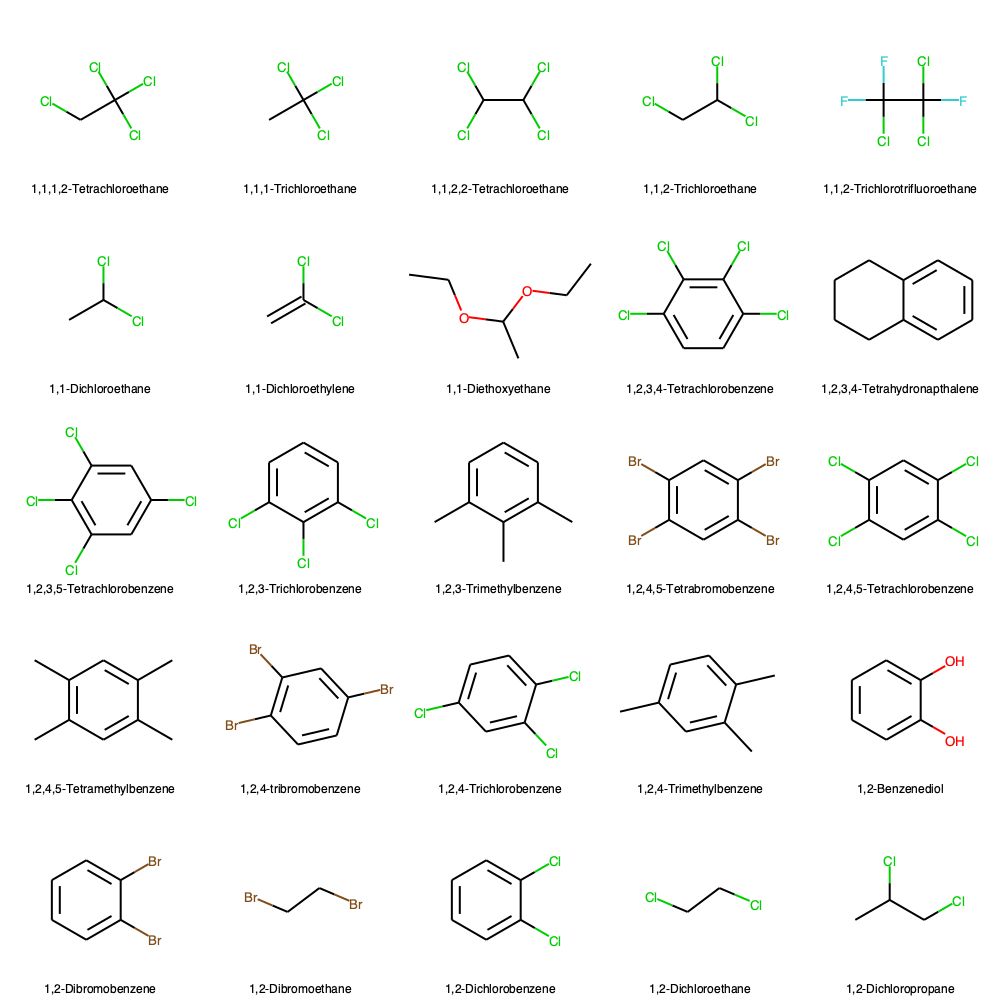

In [42]:
rdkit.Chem.Draw.MolsToGridImage(list(df['RDKitMol'][:25]), molsPerRow=5, useSVG=False, legends=list(df['Compound ID'][:25]))

In [43]:
sentence = mol2alt_sentence(df['RDKitMol'][0], 1)
sentence

['1016841875',
 '198706261',
 '2245384272',
 '2910196842',
 '2245277810',
 '2035488874',
 '1016841875',
 '170894115',
 '1016841875',
 '170894115',
 '1016841875',
 '170894115']

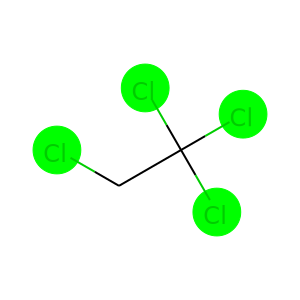

In [44]:
depict_identifier(df['RDKitMol'][0], 1016841875, 1)

In [49]:
model = word2vec.Word2Vec.load('data/mol2vec_model_300dim.pkl')
print("Vocab size: ", len(model.wv.vocab.keys()))

Vocab size:  21003


In [51]:
df['MolVec'] = [mol2alt_sentence(x, 1) for x in df['RDKitMol']]

In [52]:
df.head()

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES,RDKitMol,MolVec
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","[1016841875, 198706261, 2245384272, 2910196842..."
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","[2246728737, 3537123720, 2245277810, 203257140..."
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","[1016841875, 170898322, 2245273601, 2163923111..."
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","[1016841875, 198706261, 2245384272, 2910193141..."
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.077,FC(F)(Cl)C(F)(Cl)Cl,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","[882399112, 485463469, 2245277810, 262673770, ..."


In [53]:
??sentences2vec

Signature: sentences2vec(sentences, model, unseen=None)
Source:   
def sentences2vec(sentences, model, unseen=None):
    """Generate vectors for each sentence (list) in a list of sentences. Vector is simply a
    sum of vectors for individual words.
    
    Parameters
    ----------
    sentences : list, array
        List with sentences
    model : word2vec.Word2Vec
        Gensim word2vec model
    unseen : None, str
        Keyword for unseen words. If None, those words are skipped.
        https://stats.stackexchange.com/questions/163005/how-to-set-the-dictionary-for-text-analysis-using-neural-networks/163032#163032

    Returns
    -------
    np.array
    """
    keys = set(model.wv.vocab.keys())
    vec = []
    if unseen:
        unseen_vec = model.wv.word_vec(unseen)

    for sentence in sentences:
        if unseen:
            vec.append(sum([model.wv.word_vec(y) if y in set(sentence) & keys
                       else unseen_vec for y in sentence]))
        else:
         